<a href="https://colab.research.google.com/github/wkdtjrrb/SPIDER/blob/main/NLPprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python NHSENTIMENT.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/NH/NHSENTIMENT.py", line 20, in <module>
    df_1 = pd.read_csv(r"C:/Users/User/Downloads/NASDAQ_RSS_IFO_202301.csv", encoding='cp949')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/NH'

/content/drive/MyDrive/NH


In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.w

In [ ]:
import pandas as pd
import spacy
import nltk
import re
import warnings
import numpy as np
import math

import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.fft import fft
from scipy.interpolate import splrep, splev
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.arima.model import ARIMA
from scipy.interpolate import interp1d


warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#데이터 가져오기
df01 = pd.read_csv('./NASDAQ_RSS_IFO_202301.csv', encoding ='cp949')
df02 = pd.read_csv('./NASDAQ_RSS_IFO_202302.csv', encoding ='cp949')
df03 = pd.read_csv('./NASDAQ_RSS_IFO_202303.csv', encoding ='cp949')
df04 = pd.read_csv('./NASDAQ_RSS_IFO_202304.csv', encoding ='cp949')
df05 = pd.read_csv('./NASDAQ_RSS_IFO_202305.csv', encoding ='cp949')
df06 = pd.read_csv('./NASDAQ_RSS_IFO_202306.csv', encoding ='cp949')
df07 = pd.read_csv('./NASDAQ_RSS_IFO_202307.csv', encoding ='cp949')
df08 = pd.read_csv('./NASDAQ_RSS_IFO_202308.csv', encoding ='cp949')
dfe= pd.read_csv('./2308-경제.csv')
dfsp = pd.read_csv('./S&P 500 과거 데이터.csv')
df = pd.read_csv('./NASDAQ_DT_FC_STK_QUT.csv',encoding ='cp949')

In [ ]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['trd_dt', 'tck_iem_cd', 'gts_iem_ong_pr', 'gts_iem_hi_pr',
       'gts_iem_low_pr', 'gts_iem_end_pr', 'gts_acl_trd_qty',
       'gts_sll_cns_sum_qty', 'gts_byn_cns_sum_qty'],
      dtype='object')

In [ ]:
df.isnull().sum()

trd_dt                 0
tck_iem_cd             0
gts_iem_ong_pr         0
gts_iem_hi_pr          0
gts_iem_low_pr         0
gts_iem_end_pr         0
gts_acl_trd_qty        0
gts_sll_cns_sum_qty    0
gts_byn_cns_sum_qty    0
dtype: int64

In [ ]:
df['gts_iem_avg_pr'] = (df['gts_iem_low_pr'] + df['gts_iem_hi_pr']) / 2

In [ ]:
df['gts_iem_dif_pr'] = (df['gts_iem_low_pr'] - df['gts_iem_hi_pr'])

In [ ]:
df["diff"] = df["gts_iem_end_pr"].shift(-1) - df["gts_iem_end_pr"]

In [ ]:
df["diff"]

0        -142.3978
1           1.2078
2          -0.3300
3          17.0700
4          -8.5100
            ...   
455333     -4.3700
455334     14.8300
455335      0.3900
455336    -13.6000
455337         NaN
Name: diff, Length: 455338, dtype: float64

In [ ]:
df.dropna(axis = 0,inplace = True)
df['diff']

0        -142.3978
1           1.2078
2          -0.3300
3          17.0700
4          -8.5100
            ...   
455332     -9.9600
455333     -4.3700
455334     14.8300
455335      0.3900
455336    -13.6000
Name: diff, Length: 455337, dtype: float64

# 1. 주식 정보를 이용해 주가 정보를 예측하는 모델 제작(다변량 예측)

In [ ]:
df['trd_dt'].dtypes

dtype('int64')

In [ ]:
df['trd_dt'] = pd.to_datetime(df['trd_dt'], format='%Y%m%d', errors='coerce')

print(df['trd_dt'].dtypes)

datetime64[ns]


In [ ]:
df['trd_dt']

0        2023-01-03
1        2023-01-03
2        2023-01-03
3        2023-01-03
4        2023-01-03
            ...    
455332   2023-08-30
455333   2023-08-30
455334   2023-08-30
455335   2023-08-30
455336   2023-08-30
Name: trd_dt, Length: 455337, dtype: datetime64[ns]

In [ ]:
start_date = pd.to_datetime('20230103', format='%Y%m%d')
end_date = pd.to_datetime('20230830', format='%Y%m%d')

fdf = df[(df['trd_dt'] >= start_date) & (df['trd_dt'] <= end_date)]

In [ ]:
fdf['trd_dt']

0        2023-01-03
1        2023-01-03
2        2023-01-03
3        2023-01-03
4        2023-01-03
            ...    
455332   2023-08-30
455333   2023-08-30
455334   2023-08-30
455335   2023-08-30
455336   2023-08-30
Name: trd_dt, Length: 455337, dtype: datetime64[ns]

1. 데이터 전처리


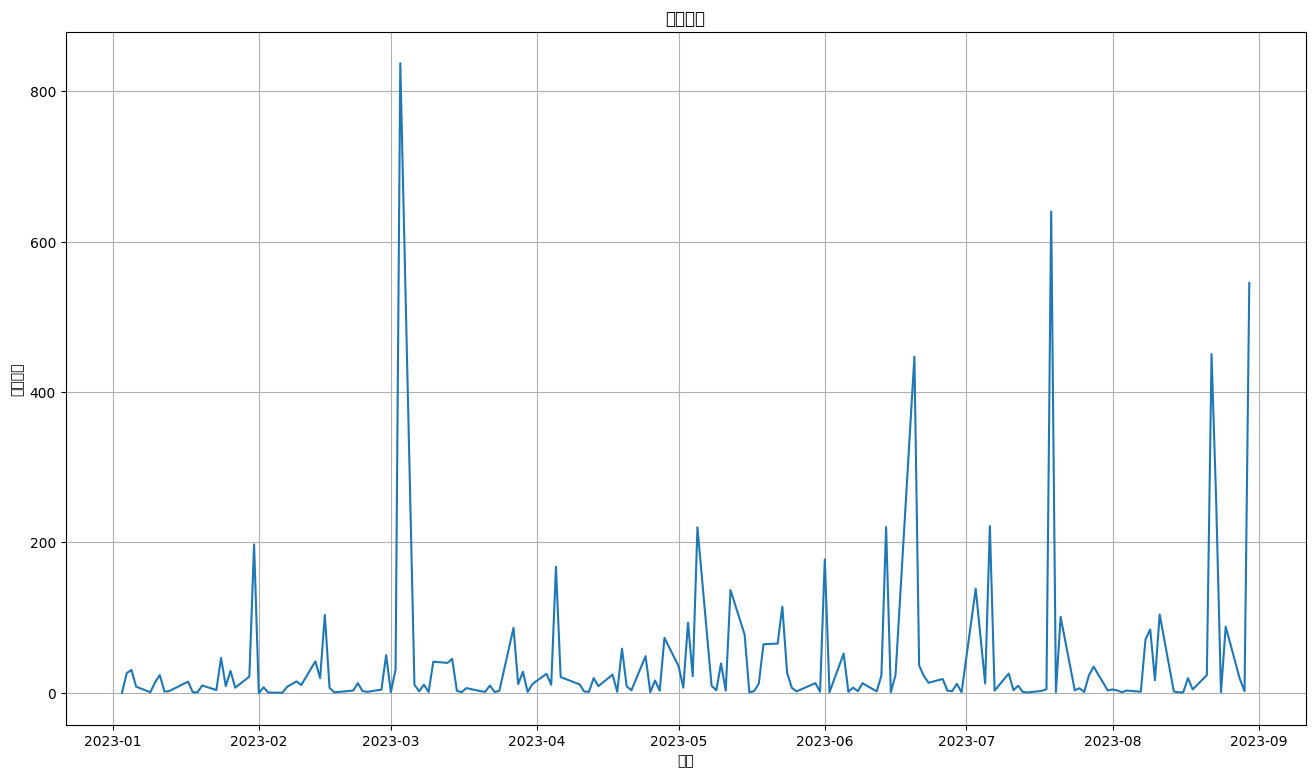

In [ ]:
fdf = fdf[fdf['tck_iem_cd']=='TTOO']
plt.figure(figsize = (16,9))
plt.plot(fdf['trd_dt'],fdf['diff'])
plt.title('가격차이')
plt.xlabel("날짜")
plt.ylabel("가격차이")
plt.grid(True)
plt.show()

In [ ]:
def adf_test(data):
  result = adfuller(data.values)
  print('ADF Statistics: %f' % result[0])
  print('p-value: %f' % result[1])
  print('num of lags: %f' % result[2])
  print('num of observations: %f' % result[3])
  print('Critical values:')
  for k, v in result[4].items():
      print('\t%s: %.3f' % (k,v))

In [ ]:
ts = fdf.set_index('trd_dt')

In [ ]:
adf_test(ts['diff'])

ADF Statistics: -12.121438
p-value: 0.000000
num of lags: 0.000000
num of observations: 165.000000
Critical values:
	1%: -3.471
	5%: -2.879
	10%: -2.576


In [ ]:
ts.drop({'tck_iem_cd'},axis =1,inplace=True)

In [ ]:
col = ['gts_iem_ong_pr', 'gts_iem_hi_pr', 'gts_iem_low_pr', 'gts_iem_end_pr',
       'gts_acl_trd_qty', 'gts_sll_cns_sum_qty', 'gts_byn_cns_sum_qty',
       'gts_iem_avg_pr', 'gts_iem_dif_pr', 'diff']

In [ ]:
fdf.rename(columns={'trd_dt': 'ds', 'gts_iem_end_pr': 'y'}, inplace=True)

In [ ]:
fdf['ds'] = pd.to_datetime(fdf['ds'])
fdf['ds']

307      2023-01-03
3841     2023-01-04
6394     2023-01-05
8447     2023-01-06
11846    2023-01-09
            ...    
443273   2023-08-24
444611   2023-08-25
448379   2023-08-28
450897   2023-08-29
454896   2023-08-30
Name: ds, Length: 166, dtype: datetime64[ns]

In [ ]:
all_dates = pd.date_range(start=ts.index.min(), end=ts.index.max())
ts = ts.reindex(all_dates)
ts[col] = ts[col].interpolate(method='linear')

In [ ]:
predicted_values = pd.DataFrame(columns=['ds', 'yhat'])

# 초기 모델 생성 (1월 데이터로 학습)
model = Prophet()
model.fit(fdf[fdf['ds'].dt.month == 1])
prediction_period = 1  # 1일씩 예측

# 2월부터 8월까지 예측 수행
start_date = pd.to_datetime('2023-02-01')
end_date = pd.to_datetime('2023-08-31')

while start_date <= end_date:
    prediction_range = pd.date_range(start=start_date, periods=prediction_period)
    future = model.make_future_dataframe(periods=len(prediction_range))
    train_data = fdf[fdf['ds'] <= start_date]

    model = Prophet()
    model.fit(train_data)

    forecast = model.predict(future)
    predicted_values = pd.concat([predicted_values, forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)][['ds', 'yhat']]])
    start_date += pd.DateOffset(days=prediction_period)

print(predicted_values)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0y3pi2ih/lr0hd010.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0y3pi2ih/8xbpx7q4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29321', 'data', 'file=/tmp/tmp0y3pi2ih/lr0hd010.json', 'init=/tmp/tmp0y3pi2ih/8xbpx7q4.json', 'output', 'file=/tmp/tmp0y3pi2ih/prophet_modelp35df71f/prophet_model-20231015172543.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:

            ds      yhat
20  2023-02-01  1.508345
21  2023-02-02  1.449982
22  2023-02-03  1.617226
23  2023-02-04 -1.284025
24  2023-02-07  1.467801
..         ...       ...
162 2023-08-25  0.390424
163 2023-08-26  0.155784
164 2023-08-29  0.403153
165 2023-08-30  0.384951
166 2023-08-31  0.385918

[147 rows x 2 columns]


In [ ]:
predicted_values.shape

(147, 2)

In [ ]:
predicted_values = predicted_values[predicted_values['ds'].isin(fdf['ds'])]
predicted_values.shape

(115, 2)

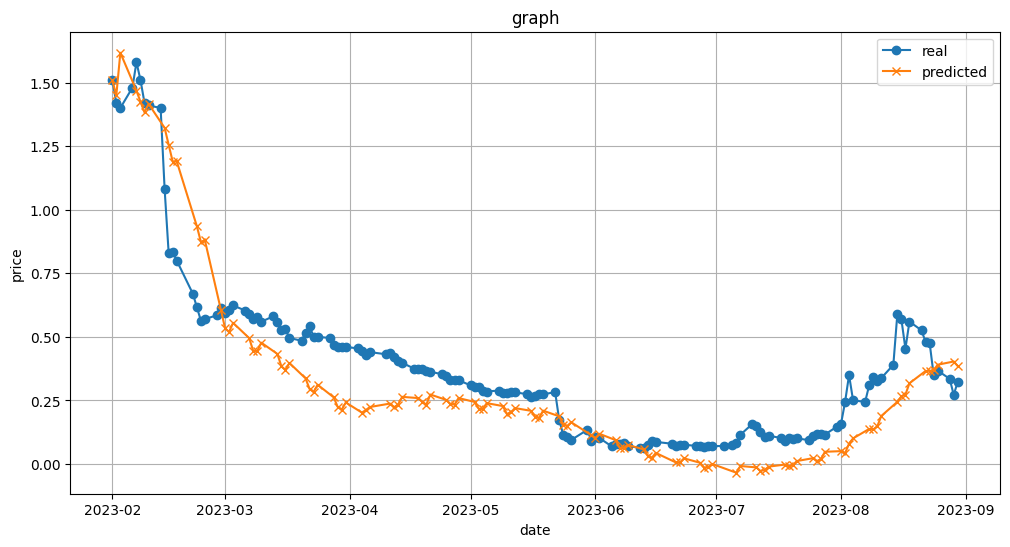

In [ ]:
actual_values = fdf[(fdf['ds'] >= '2023-02-01')]
plt.figure(figsize=(12, 6))
plt.plot(actual_values['ds'], actual_values['y'], label='real', marker='o')
plt.plot(predicted_values['ds'], predicted_values['yhat'], label='predicted', marker='x')
plt.xlabel('date')
plt.ylabel('price')
plt.title('graph')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#predicted_value = predicted_values.set_index('ds')
#actual_value = actual_values.set_index('ds')

# 예측값과 실제값의 차이
pred_diff_NVIV = actual_values['y'] - predicted_values['yhat']
print(pred_diff_NVIV)

ds
2023-02-01    0.001655
2023-02-02   -0.029982
2023-02-03   -0.217226
2023-02-06         NaN
2023-02-07    0.112199
                ...   
2023-08-24   -0.016418
2023-08-25   -0.022924
2023-08-28         NaN
2023-08-29   -0.131553
2023-08-30   -0.060951
Length: 146, dtype: float64


In [ ]:
predicted_values['yhat'].shape

(115,)

In [ ]:
actual_values['y']

ds
2023-02-01    1.5100
2023-02-02    1.4200
2023-02-03    1.4000
2023-02-06    1.4800
2023-02-07    1.5800
               ...  
2023-08-24    0.3519
2023-08-25    0.3675
2023-08-28    0.3350
2023-08-29    0.2716
2023-08-30    0.3240
Name: y, Length: 146, dtype: float64

In [ ]:
pred_diff_NVIV.dropna(inplace = True)

In [ ]:
pred_diff_NVIV = pred_diff_NVIV.rename('pred_diff_NVIV')
fdf = fdf.merge(pred_diff_NVIV, left_on='ds', right_index=True, how='left')

In [ ]:
from sklearn.metrics import mean_squared_error

merged_df = pd.merge(actual_values, predicted_values, on='ds', how='inner')

#merged_df.fillna(0, inplace=True)

actual_y = merged_df['y']
predicted_yhat = merged_df['yhat']

# MSE를 계산
rmse = mean_squared_error(actual_y, predicted_yhat) ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.15278785608215006


In [ ]:
merged_df.columns

Index(['tck_iem_cd', 'gts_iem_ong_pr', 'gts_iem_hi_pr', 'gts_iem_low_pr', 'y',
       'gts_acl_trd_qty', 'gts_sll_cns_sum_qty', 'gts_byn_cns_sum_qty',
       'gts_iem_avg_pr', 'gts_iem_dif_pr', 'diff', 'yhat'],
      dtype='object')

In [ ]:
merged_df.shape

(115, 12)

In [ ]:
fdf['pred_diff_NVIV']

307            NaN
3841           NaN
6394           NaN
8447           NaN
11846          NaN
            ...   
443273   -0.016418
444611   -0.022924
448379         NaN
450897   -0.131553
454896   -0.060951
Name: pred_diff_NVIV, Length: 166, dtype: float64

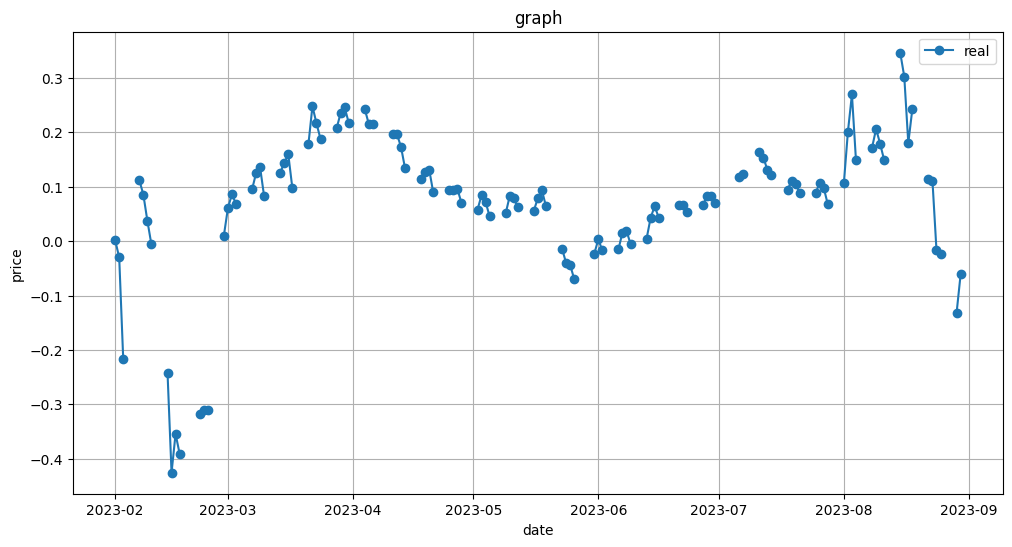

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fdf['ds'], fdf['pred_diff_NVIV'], label='real', marker='o')
plt.xlabel('date')
plt.ylabel('price')
plt.title('graph')
plt.legend()
plt.grid(True)
plt.show()

# 3. 뉴스 분석

1. Stopword Processing

<목표>
- 주 판단에 영향을 주지 않는 빈도가 높은 경우 불용어 사전에 추가해 다음 정제에 효과적으로 사용될 수 있도록 함

In [ ]:
df[df['tck_iem_cd']=='TTOO']

,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty,gts_iem_avg_pr,gts_iem_dif_pr,diff
307,2023-01-03,TTOO,1.3900,1.6899,1.3600,1.6000,341327.0,135069.0,206258.0,1.52495,-0.3299,-0.2900
3841,2023-01-04,TTOO,1.6000,1.6800,1.5600,1.6100,144092.0,91984.0,52108.0,1.62000,-0.1200,25.8800
6394,2023-01-05,TTOO,1.5600,1.6900,1.5001,1.6700,132159.0,50209.0,81950.0,1.59505,-0.1899,30.0700
8447,2023-01-06,TTOO,1.6900,1.7900,1.6200,1.7300,167030.0,82132.0,84898.0,1.70500,-0.1700,7.7950
11846,2023-01-09,TTOO,1.7000,1.7792,1.7000,1.7100,119080.0,68055.0,51025.0,1.73960,-0.0792,0.4200
...,...,...,...,...,...,...,...,...,...,...,...,...
443273,2023-08-24,TTOO,0.4200,0.4350,0.3380,0.3519,109717904.0,47026307.0,62691597.0,0.38650,-0.0970,0.5581
444611,2023-08-25,TTOO,0.3934,0.4046,0.3512,0.3675,98143146.0,37194368.0,60948778.0,0.37790,-0.0534,87.7925
448379,2023-08-28,TTOO,0.3789,0.3859,0.3111,0.3350,82232461.0,40504763.0,41727698.0,0.34850,-0.0748,17.9750
450897,2023-08-29,TTOO,0.2950,0.3030,0.2690,0.2716,88635090.0,46153461.0,42481629.0,0.28600,-0.0340,1.9884


In [ ]:
# Stopword 다운로드
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_arr = [df01 ,df02 ,df03 ,df04 ,df05 ,df06 ,df07 ,df08 ]
dfs = pd.concat(df_arr,ignore_index = True)

In [ ]:
Bioset = set(dfs[dfs['ctgy_cfc_ifo']=='BioTech']['tck_iem_cd'])
Bioset

{'ASML', 'BIVI', 'GSK', 'NAN', 'PHG'}

In [ ]:
dfs.columns

Index(['rgs_dt', 'tck_iem_cd', 'til_ifo', 'ctgy_cfc_ifo', 'mdi_ifo',
       'news_smy_ifo', 'rld_ose_iem_tck_cd', 'url_ifo'],
      dtype='object')

In [ ]:
dfs[dfs['tck_iem_cd']=='TTOO']['rgs_dt']

102526     20230213
102529     20230213
103107     20230213
103261     20230213
103476     20230213
             ...   
2169485    20230817
2172986    20230817
2174593    20230817
2175665    20230817
2177138    20230817
Name: rgs_dt, Length: 301, dtype: int64

In [ ]:
dfs['title_content'] = dfs['til_ifo'] + ' ' + dfs['news_smy_ifo']

In [ ]:
dfs[dfs['tck_iem_cd']=='TTOO']['title_content'].nunique()

10

In [ ]:
dfs[(dfs['tck_iem_cd'] == 'NVIV')&(dfs['rgs_dt']== 20230102)]

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,url_ifo,title_content
5,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
49,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
62,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
72,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
76,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
78,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
98,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
119,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
126,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...
130,20230102,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...,France's InVivo to buy one of the world's olde...


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from nltk.corpus import stopwords
import nltk
import re

In [ ]:
dfs['combined_til&smy'] = dfs['til_ifo'] + ' ' + dfs['news_smy_ifo']

In [ ]:
dfs = dfs.drop(['til_ifo', 'news_smy_ifo', 'url_ifo'], axis=1)
dfs['combined_til&smy'] = dfs['combined_til&smy'].str.lower()

In [ ]:
#allowed_values = ['NVIV', 'TTOO', 'BIVI']
allowed_values = ['TTOO']
dfs = dfs[dfs['tck_iem_cd'].isin(allowed_values)]

In [ ]:
dfs = dfs.drop(['rld_ose_iem_tck_cd'], axis=1)

In [ ]:
dfs['rgs_dt'] = pd.to_datetime(dfs['rgs_dt'], format='%Y%m%d')

In [ ]:
# 감정 분석 함수 정의
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity  # polarity: -1(부정) ~ 1(긍정)
    return sentiment

# 모든 데이터에 대한 감정 분석 수행
dfs['sentiment'] = dfs['combined_til&smy'].apply(analyze_sentiment)


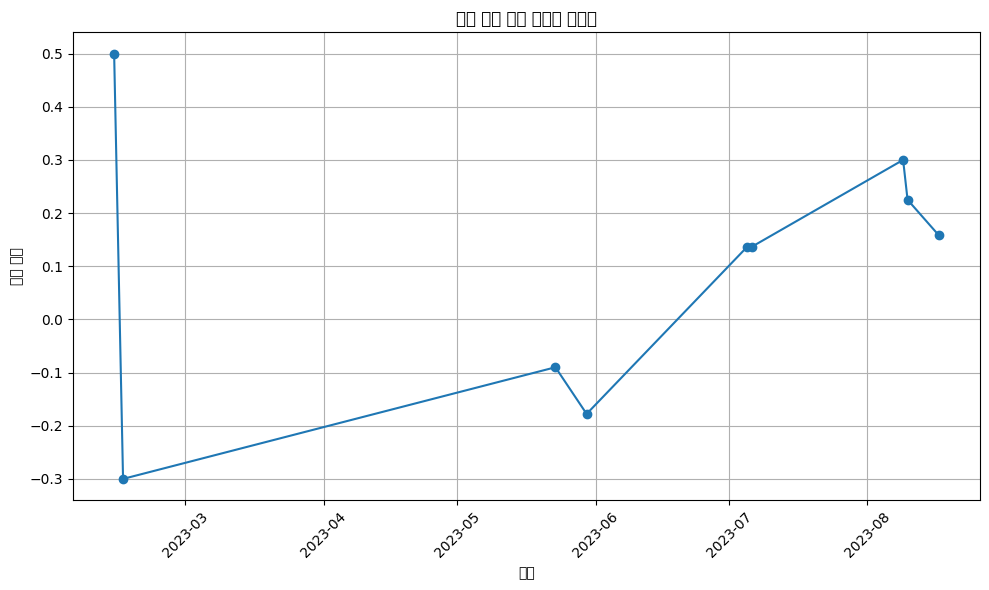

In [ ]:
result_df = dfs.groupby('rgs_dt')['sentiment'].mean().reset_index()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(result_df['rgs_dt'], result_df['sentiment'], marker='o', linestyle='-')
plt.title('감정 분석 결과 시계열 그래프')
plt.xlabel('날짜')
plt.ylabel('감정 점수')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def clean_text(text):
    # 정규 표현식을 사용하여 문자열에서 숫자와 특수 기호를 공백으로 대체
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# 'combined_til&smy' 열 정제
dfs['combined_til&smy'] = dfs['combined_til&smy'].apply(clean_text)


In [ ]:
# 불용어 사전에 단어 추가
stop_words = set(stopwords.words('english'))
stop_words.add('of')
stop_words.add('in')# '영향' 단어를 불용어로 추가

In [ ]:
# 'combined_til&smy' 열에서 중복된 문자열 제거
dfs['combined_til&smy'] = dfs['combined_til&smy'].drop_duplicates()

# 'combined_til&smy' 열이 NaN인 행 제거
dfs = dfs.dropna(subset=['combined_til&smy'])

In [ ]:
def analyze_sentiment(text):
    # 불용어 제거
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)

    # 감정 분석
    analysis = TextBlob(filtered_text)
    sentiment = analysis.sentiment.polarity  # polarity: -1(부정) ~ 1(긍정)
    return sentiment

dfs1 = dfs.copy()  # 원본 데이터프레임을 복사하여 새로운 변수 dfs1에 저장
dfs1['sentiment'] = dfs1['combined_til&smy'].apply(analyze_sentiment)


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# 'combined_til&smy' 열의 내용을 가져와서 토큰화
sentences = [word_tokenize(str(sentence).lower()) for sentence in dfs1['combined_til&smy']]

# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# 데이터를 학습 데이터와 테스트 데이터로 나누기
X = dfs1['combined_til&smy']
y = dfs1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 문장을 밀집 벡터로 변환하는 함수 정의
def sentence_to_vector(sentence, model):
    words = word_tokenize(str(sentence).lower())  # 문자열로 변환 후 토큰화
    vector = [model.wv[word] for word in words if word in model.wv]
    if not vector:
        return [0] * 100  # 모든 요소가 0인 벡터 반환 (길이는 모델의 벡터 크기와 같아야 함)
    return sum(vector) / len(vector)  # 벡터의 평균을 구함

# X_train 및 X_test에 대해 문장을 밀집 벡터로 변환
X_train_word2vec = [sentence_to_vector(sentence, model) for sentence in X_train]
X_test_word2vec = [sentence_to_vector(sentence, model) for sentence in X_test]


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 텍스트 데이터를 Word2Vec 벡터로 변환하는 함수 정의
def text_to_vector(text):
    words = word_tokenize(text.lower())
    vector = [model.wv[word] for word in words if word in model.wv]
    if not vector:
        return [0] * 100  # 모든 요소가 0인 벡터 반환 (Word2Vec 벡터 크기에 맞게 설정)
    return np.mean(vector, axis=0)  # 벡터의 평균을 구함

# 데이터프레임의 'combined_til&smy' 열을 벡터로 변환
dfs1['text_vector'] = dfs1['combined_til&smy'].apply(text_to_vector)

# 변환된 벡터를 X로 설정
X = np.stack(dfs1['text_vector'].to_numpy())
Y = dfs1['sentiment']  # 감정 점수가 있는 열을 선택

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# 학습된 모델로 예측
Y_pred = clf.predict(X_test)

# 모델 평가 (예시로 평균 제곱 오차와 결정 계수 사용)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# 감정 점수 예측 결과 확인
predicted_scores = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(predicted_scores.head())

Mean Squared Error: 0.028747196051423337
R-squared (R2) Score: 0.5828071321335389
         Actual  Predicted
2011001   0.225   0.183273
122479   -0.300  -0.063879


In [ ]:
# dfs1과 fdf비교
dfs1.rename(columns={'rgs_dt': 'ds'}, inplace=True)
dfs1['ds'] = pd.to_datetime(dfs1['ds'], format='%Y%m%d')
merged_df = pd.merge(fdf, dfs1, on='ds', how='outer')


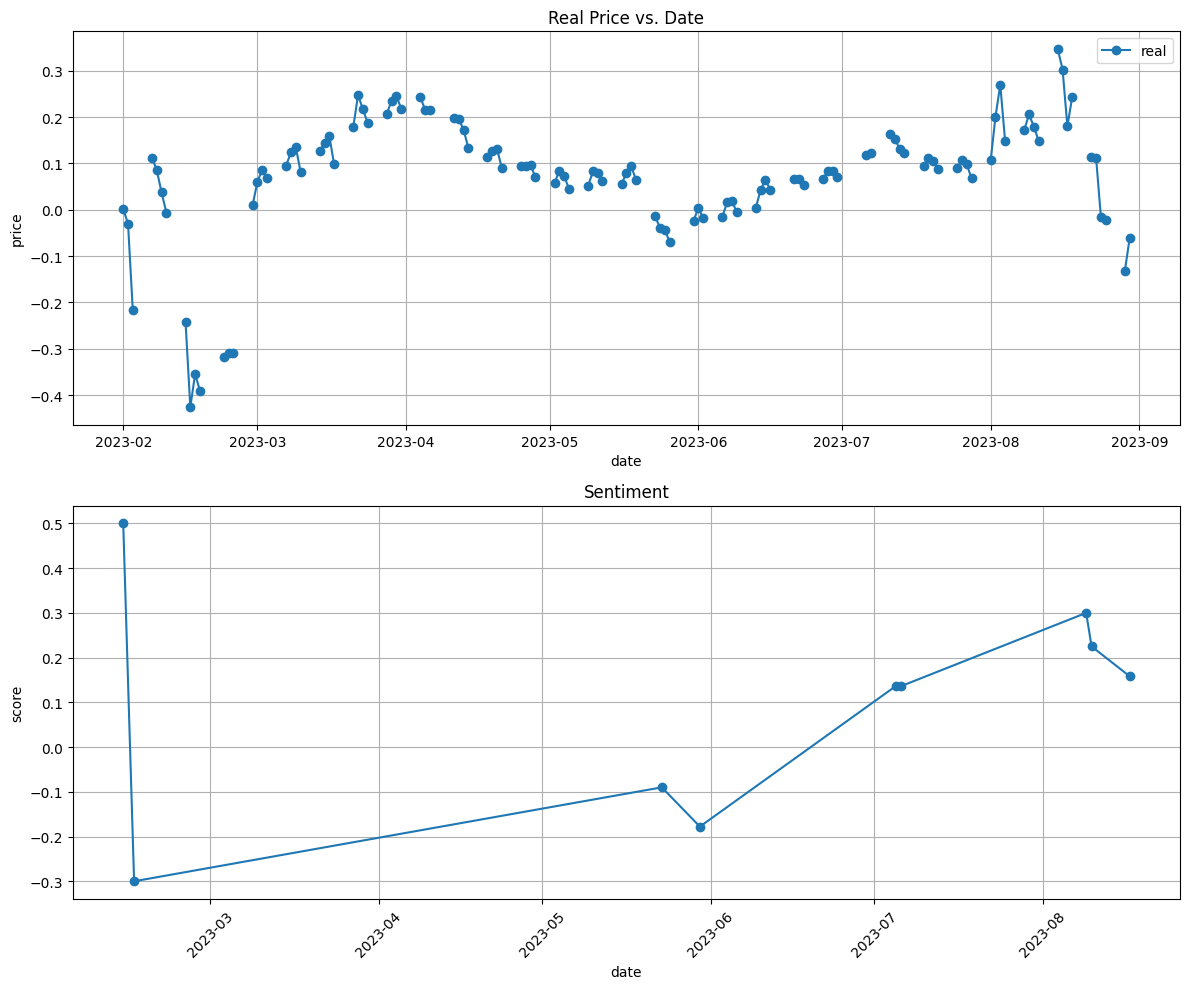

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(fdf['ds'], fdf['pred_diff_NVIV'], label='real', marker='o')
ax1.set_xlabel('date')
ax1.set_ylabel('price')
ax1.set_title('Real Price vs. Date')
ax1.legend()
ax1.grid(True)

ax2.plot(result_df['rgs_dt'], result_df['sentiment'], marker='o', linestyle='-')
ax2.set_title('Sentiment')
ax2.set_xlabel('date')
ax2.set_ylabel('score')
ax2.grid(True)
ax2.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

plt.show()



In [ ]:
fdf[fdf['ds']=='2023-05-23']['pred_diff_NVIV']

267577   -0.013733
Name: pred_diff_NVIV, dtype: float64

In [ ]:
day_interval = pd.DateOffset(days=1)

In [ ]:
dfs1 = dfs1.groupby('ds').agg({'sentiment': 'sum'}).reset_index()

# 결과 데이터프레임 출력
print(dfs1)

          ds  sentiment
0 2023-02-13   0.500000
1 2023-02-15  -0.300000
2 2023-05-23  -0.066667
3 2023-05-30  -0.400000
4 2023-07-05   0.136364
5 2023-07-06   0.136364
6 2023-08-09   0.300000
7 2023-08-10   0.225000
8 2023-08-17   0.090000


In [ ]:
new_dates = [date + pd.DateOffset(days=1) for date in dfs1['ds']]
new_sentiments = dfs1['sentiment']

# 새로운 데이터프레임 생성
new_data = {
    'sentiment': new_sentiments,
    'ds': new_dates
}
new_dfs1 = pd.DataFrame(new_data)

In [ ]:
# 기존 데이터프레임에 새로운 날짜와 sentiment를 추가
dfs1_extended = pd.concat([dfs1, new_dfs1])
dfs1_extended = dfs1_extended.sort_values(by='ds', ascending=True)
dfs1_extended = dfs1_extended.reset_index()
# 결과 데이터프레임 출력
print(dfs1_extended[{'ds','sentiment'}])

    sentiment         ds
0    0.500000 2023-02-13
1    0.500000 2023-02-14
2   -0.300000 2023-02-15
3   -0.300000 2023-02-16
4   -0.066667 2023-05-23
5   -0.066667 2023-05-24
6   -0.400000 2023-05-30
7   -0.400000 2023-05-31
8    0.136364 2023-07-05
9    0.136364 2023-07-06
10   0.136364 2023-07-06
11   0.136364 2023-07-07
12   0.300000 2023-08-09
13   0.225000 2023-08-10
14   0.300000 2023-08-10
15   0.225000 2023-08-11
16   0.090000 2023-08-17
17   0.090000 2023-08-18


In [ ]:
new_df =  pd.merge(dfs1_extended, predicted_values, on='ds', how='left')

In [ ]:
new_df = new_df.dropna()
new_df

,index,ds,sentiment,yhat
1,0,2023-02-14,0.500000,1.321717
2,1,2023-02-15,-0.300000,1.255362
3,1,2023-02-16,-0.300000,1.189383
4,2,2023-05-23,-0.066667,0.187633
5,2,2023-05-24,-0.066667,0.155015
7,3,2023-05-31,-0.400000,0.113371
9,5,2023-07-06,0.136364,-0.034148
10,4,2023-07-06,0.136364,-0.034148
11,5,2023-07-07,0.136364,-0.007661
12,6,2023-08-09,0.300000,0.136279


In [ ]:
result_df = predicted_values.merge(new_df, on='ds', how='left')

# 결과 출력
print(result_df)

            ds    yhat_x  index  sentiment  yhat_y
0   2023-02-01  1.508345    NaN        NaN     NaN
1   2023-02-02  1.449982    NaN        NaN     NaN
2   2023-02-03  1.617226    NaN        NaN     NaN
3   2023-02-07  1.467801    NaN        NaN     NaN
4   2023-02-08  1.424524    NaN        NaN     NaN
..         ...       ...    ...        ...     ...
112 2023-08-23  0.366579    NaN        NaN     NaN
113 2023-08-24  0.368318    NaN        NaN     NaN
114 2023-08-25  0.390424    NaN        NaN     NaN
115 2023-08-29  0.403153    NaN        NaN     NaN
116 2023-08-30  0.384951    NaN        NaN     NaN

[117 rows x 5 columns]


In [ ]:
result_df.columns

Index(['ds', 'yhat_x', 'index', 'sentiment', 'yhat_y'], dtype='object')

In [ ]:
result_df['sentiment'].fillna(0,inplace=True)
result_df['sentiment'].nunique()

9

In [ ]:
result_df[result_df['ds']=='2023-08-18'][{'yhat_x','sentiment'}]

,sentiment,yhat_x
110,0.09,0.317509


In [ ]:
result_df['yhat'] = result_df['yhat_x']+0.35*result_df['sentiment']

In [ ]:
result_df[result_df['ds']=='2023-08-18'][{'yhat'}]

,yhat
110,0.349009


In [ ]:
m_df = pd.merge(actual_values, result_df, on='ds', how='inner')

act_y = m_df['y']
pred_yhat = m_df['yhat']

# MSE를 계산
rmse2 = mean_squared_error(act_y, pred_yhat) ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse2}')

Root Mean Squared Error (RMSE): 0.1480762152458108


해당 예에 대한 RMSE의 차이는 0.004로 굉장히 작지만 주어진 기사데이터의 수가 종가 데이터의 수에 비해 굉장히 적은 것을 감안하면 정확도 향상의 측면에서 의의가 있다. 이로써 기사정보를 반영하는 prophet모델이 사용될 수 있다.